In [1]:
import networkx as net
import matplotlib.pyplot as plot
rfn = "data/russians.net"

In [2]:
g = net.read_pajek(rfn)
print(len(g.nodes()))

87250


In [3]:
# Return a subnet where all nodes have degree connections or more.
def trim_degrees(g, degree=1):
    g2 = g.copy()
    d = net.degree(g)
    for n in g.nodes():
        if d[n] <= degree:
            g2.remove_node(n)
    return g2

In [4]:
dall = net.degree(g)
dalls = sorted(dall, key=lambda x: x[1], reverse=True)
dalls[:10]

[('borisakunin', 4691),
 ('doctor_liza', 3046),
 ('tareeva', 2970),
 ('cheger', 2887),
 ('karial', 2717),
 ('snorapp', 2707),
 ('masha_koroleva', 2683),
 ('elladkin', 2616),
 ('samoleg', 2597),
 ('zina_korzina', 2596)]

In [5]:
dv = [x[1] for x in dall]
print("Length dv: {ldv}".format(ldv=len(dv)))
dv[:20]

Length dv: 87250


[1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1]

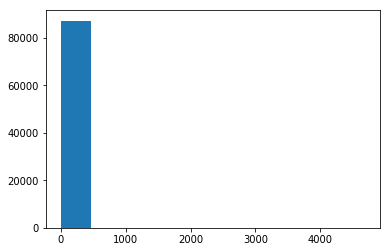

In [6]:
h = plot.hist(dv)

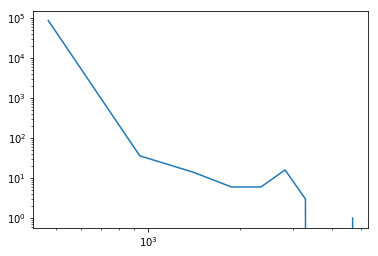

In [7]:
plot.loglog(h[1][1:],h[0])

In [8]:
core10 = trim_degrees(g, 10)
deg = net.degree(core10)
ds = sorted(deg, key=lambda x: x[1], reverse=True)
ds[:10]

[('azbukivedi', 234),
 ('valerois', 229),
 ('bagira', 204),
 ('karial', 169),
 ('kpoxa_e', 161),
 ('snorapp', 128),
 ('angerona', 121),
 ('kirulya', 120),
 ('borisakunin', 114),
 ('eprst2000', 111)]

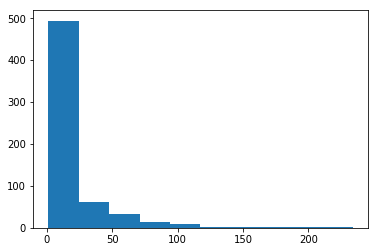

In [9]:
dsv = [x[1] for x in deg]
hs = plot.hist(dsv)

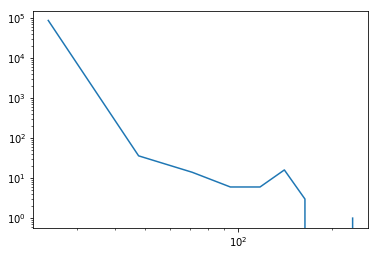

In [40]:
plot.loglog(hs[1][1:], h[0])

In [7]:
b = net.betweenness_centrality(core10)
bs = sorted(b.items(), key=lambda x: x[1], reverse=True)
bs[:10]

[('valerois', 0.21148671833684918),
 ('azbukivedi', 0.09068546983753605),
 ('bagira', 0.06415743377135999),
 ('karial', 0.049436498735116984),
 ('kpoxa_e', 0.040441270584172254),
 ('snorapp', 0.02624442003749055),
 ('borisakunin', 0.023042685592280548),
 ('kirulya', 0.022601460496828554),
 ('eprst2000', 0.021420612080769154),
 ('doctor_liza', 0.020507259543668846)]

c:\envs\sna\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


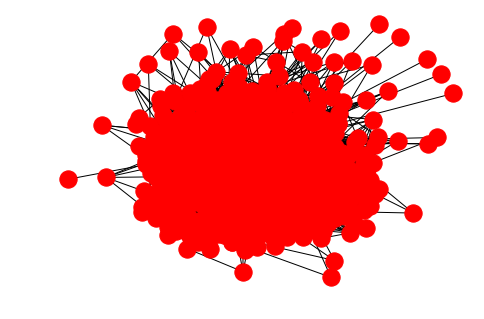

In [41]:
net.draw(core10)

In [8]:
dn = [x[0] for x in ds[:10]]
cn = [x[0] for x in cs[:10]]
bn = [x[0] for x in bs[:10]]
names = list(set(dn) | set(cn) | set(bn))

In [9]:
tbl = [[name, deg[name], c[name], b[name]] for name in names]
tbl

[['valerois', 229, 0.6137040714995035, 0.21148671833684918],
 ['snorapp', 128, 0.5300171526586621, 0.02624442003749055],
 ['bagira', 204, 0.5896946564885496, 0.06415743377135999],
 ['azbukivedi', 234, 0.6155378486055777, 0.09068546983753605],
 ['kirulya', 120, 0.5364583333333334, 0.022601460496828554],
 ['eprst2000', 111, 0.5286569717707442, 0.021420612080769154],
 ['yelya', 110, 0.5369244135534318, 0.015239326752752018],
 ['borisakunin', 114, 0.53184165232358, 0.023042685592280548],
 ['karial', 169, 0.5738161559888579, 0.049436498735116984],
 ['kpoxa_e', 161, 0.5722222222222222, 0.040441270584172254],
 ['angerona', 121, 0.535064935064935, 0.01923800645354709],
 ['doctor_liza', 110, 0.48168355416991426, 0.020507259543668846]]

In [15]:
g_core10 = net.Graph(core10)
e = net.eigenvector_centrality(g_core10)
es = sorted(e.items(), key=lambda x: x[1], reverse=True)
es[:10]

[('azbukivedi', 0.23811919508796026),
 ('valerois', 0.21385191071863055),
 ('bagira', 0.2133601777875128),
 ('kpoxa_e', 0.186011778780494),
 ('karial', 0.16918600112428722),
 ('yelya', 0.13473163140887556),
 ('angerona', 0.134575838803282),
 ('boctok', 0.12118363426455767),
 ('mamaracha', 0.1104447698013433),
 ('snorapp', 0.10954663034809892)]

In [17]:
p = net.pagerank(g_core10)
ps = sorted(p.items(), key=lambda x: x[1], reverse=True)
ps[:10]

[('valerois', 0.01761028534552088),
 ('azbukivedi', 0.014962257152541724),
 ('bagira', 0.013071988890355277),
 ('karial', 0.010925007536674827),
 ('kpoxa_e', 0.010181367846065513),
 ('snorapp', 0.008344777926142936),
 ('kirulya', 0.007863255017903945),
 ('angerona', 0.007814922691391503),
 ('borisakunin', 0.007574804468466216),
 ('doctor_liza', 0.007304380885144853)]

In [14]:
type(core10)

networkx.classes.multigraph.MultiGraph